# Pytorch Performance Evaluation
In this project I created a neuronal network with pytorch. It has forward and backward propagation and can calculate the performance together with loss and execution time. During several batches we changed nearly all 

In [3]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Batch 1: Baseline - 100 Epochs

In the first approach we set the baseline of this evaluation with the first set of hyperparameters.LU(alpha=0.3),
}
nnLU(alpha=0.3),
}

In [5]:
#input_size = 28 * 28
#output_size = 10
#hidden_layer_neurons = [512]
#epochs = 100
#learning_rates = [0.01, 0.001, 0.0001, 0.00001]
#optimizer = optim.SGD
#loss_function = nn.CrossEntropyLoss(), except for sigmoid =nn.BCEWithLogitsLoss()
#activation_functions = {
#    "ReLU": nn.ReLU(),
#    "Sigmoid": nn.Sigmoid(),
#    "LeakyReLu-0.01": nn.LeakyReLU(negative_slope=0.01),
#    "LeakyReLu-0.05": nn.LeakyReLU(negative_slope=0.05),
#    "LeakyReLu-0.1": nn.LeakyReLU(negative_slope=0.1),
#    "LeakyReLu-0.5": nn.LeakyReLU(negative_slope=0.5),
#    "PreLU": nn.PReLU(),
#    "ELU-0.1": nn.ELU(alpha=0.1),
#    "ELU-0.02": nn.ELU(alpha=0.2),
#    "ELU-0.03": nn.ELU(alpha=0.3)}

In [6]:
# load latest Performance File
df_performance = pd.read_csv("./output/2025-03-07 15-25_performance.csv")
df_performance["Epochs"] = 100
df_performance["Batch"] = 1

print(f"Shape: {df_performance.shape}")
df_performance.sort_values("Test Accuracy", ascending=False).head(10)

Shape: (40, 8)


,Learning Rate,Activation Function,Loss,Duration,Train Accuracy,Test Accuracy,Epochs,Batch
14,0.0010,LeakyReLu-0.1,0.0008,66.35,100.000000,95.05,100,1
12,0.0010,LeakyReLu-0.01,0.0006,66.03,99.612452,94.60,100,1
13,0.0010,LeakyReLu-0.05,0.0003,65.95,99.974997,94.20,100,1
15,0.0010,LeakyReLu-0.5,0.0007,65.93,100.000000,93.95,100,1
22,0.0001,LeakyReLu-0.01,0.0220,66.39,98.362295,93.15,100,1
24,0.0001,LeakyReLu-0.1,0.0593,65.70,98.462308,92.80,100,1
29,0.0001,ELU-0.03,0.0463,89.14,98.537317,92.10,100,1
23,0.0001,LeakyReLu-0.05,0.0094,65.95,97.912239,91.95,100,1
25,0.0001,LeakyReLu-0.5,0.0202,65.32,99.662458,91.80,100,1
20,0.0001,ReLU,0.2283,65.29,96.449556,90.70,100,1


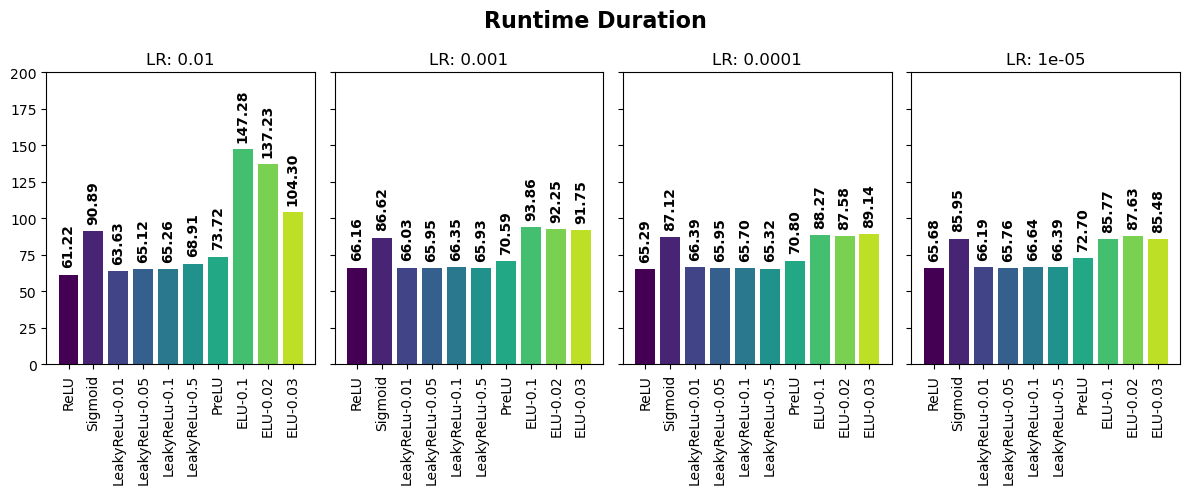

In [7]:
# Runtime duration

# data prep
activation_functions = df_performance["Activation Function"].unique()
learning_rates = df_performance["Learning Rate"].unique()

# Color map
cmap = plt.get_cmap("viridis")
color_dict = {func: cmap(i / len(activation_functions)) for i, func in enumerate(activation_functions)}

# Bar plot
fig, axes = plt.subplots(1, len(learning_rates), figsize=(12, 5), sharey=True)
fig.suptitle("Runtime Duration", fontsize=16, fontweight="bold")

for ax, lrate in zip(axes, learning_rates):
    subset = df_performance[df_performance["Learning Rate"] == lrate]
    x_positions = np.arange(len(subset))
    colors = [color_dict[func] for func in subset["Activation Function"]]
    durations = subset["Duration"]
    
    bars = ax.bar(subset["Activation Function"], durations, color=colors)
    
    ax.set_title(f"LR: {lrate}")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(subset["Activation Function"], rotation=90)

    for bar, duration in zip(bars, durations):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
            bar.get_height() + 5,             # Y position (just above the bar)
            f"{duration:.2f}",                  # Text (formatted duration)
            ha="center", va="bottom", fontsize=10, fontweight="bold",
            rotation = 90
            )
    ax.set_ylim(0, 200)
    
plt.tight_layout()
plt.show()

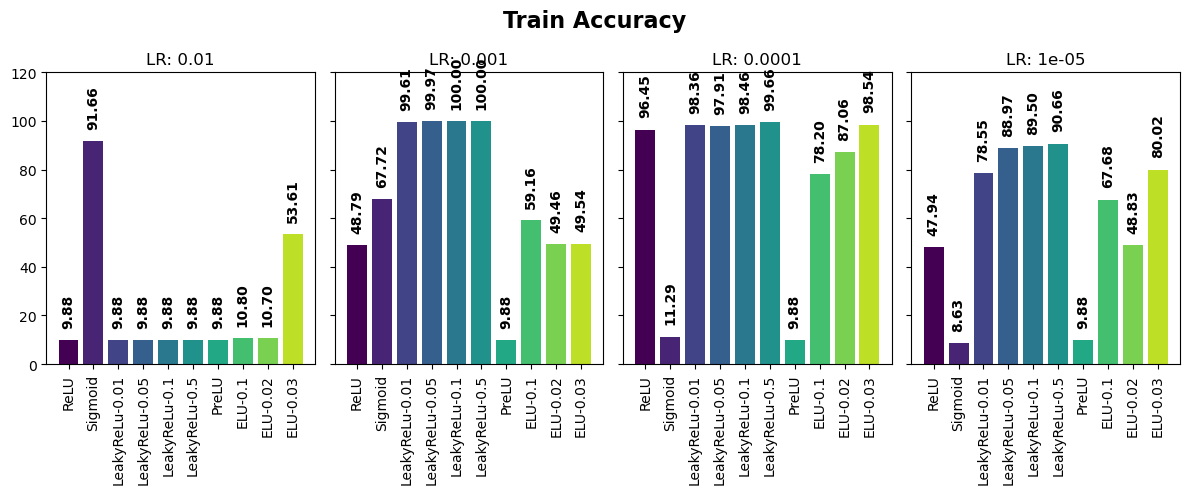

In [8]:
# Train accuracy

# Bar plot
fig, axes = plt.subplots(1, len(learning_rates), figsize=(12, 5), sharey=True)
fig.suptitle("Train Accuracy", fontsize=16, fontweight="bold")
for ax, lrate in zip(axes, learning_rates):
    subset = df_performance[df_performance["Learning Rate"] == lrate]
    x_positions = np.arange(len(subset))
    colors = [color_dict[func] for func in subset["Activation Function"]]
    train_accuracy = subset["Train Accuracy"]
    
    bars2 = ax.bar(subset["Activation Function"], train_accuracy, color=colors)
    
    ax.set_title(f"LR: {lrate}")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(subset["Activation Function"], rotation=90)

    for bar, train_acc in zip(bars2, train_accuracy):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
            bar.get_height() + 5,             # Y position (just above the bar)
            f"{train_acc:.2f}",                  # Text (formatted duration)
            ha="center", va="bottom", fontsize=10, fontweight="bold",
            rotation = 90
            )
    ax.set_ylim(0, 120)
    
plt.tight_layout()
plt.show()

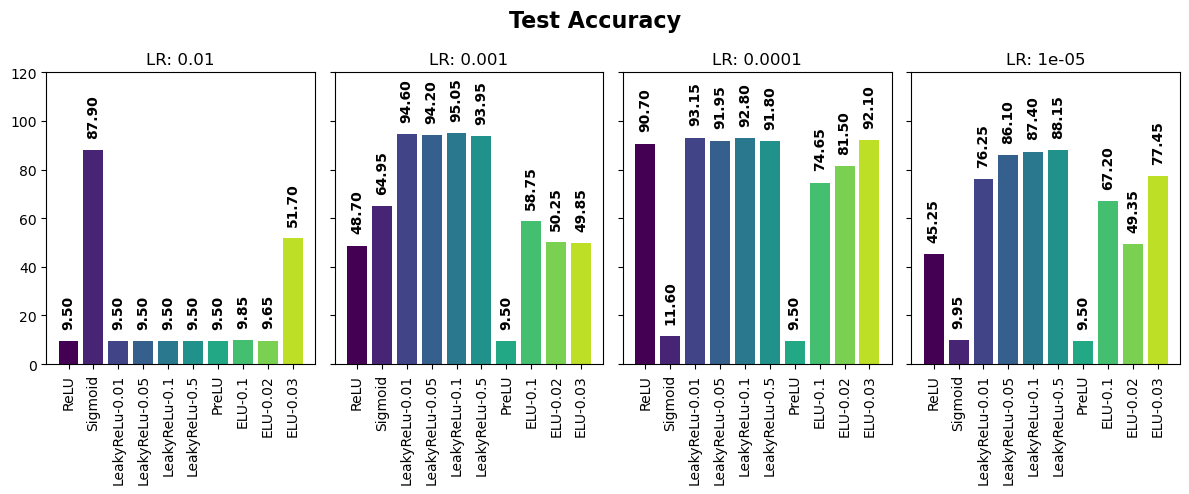

In [9]:
# Test accuracy

fig, axes = plt.subplots(1, len(learning_rates), figsize=(12, 5), sharey=True)
fig.suptitle("Test Accuracy", fontsize=16, fontweight="bold")

for ax, lrate in zip(axes, learning_rates):
    subset = df_performance[df_performance["Learning Rate"] == lrate]
    x_positions = np.arange(len(subset))
    colors = [color_dict[func] for func in subset["Activation Function"]]
    test_accuracy = subset["Test Accuracy"]
    
    bars3 = ax.bar(subset["Activation Function"], test_accuracy, color=colors)
    
    ax.set_title(f"LR: {lrate}")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(subset["Activation Function"], rotation=90)

    for bar, test_acc in zip(bars3, test_accuracy):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
            bar.get_height() + 5,             # Y position (just above the bar)
            f"{test_acc:.2f}",                  # Text (formatted duration)
            ha="center", va="bottom", fontsize=10, fontweight="bold",
            rotation = 90
            )
    ax.set_ylim(0, 120)
    
plt.tight_layout()
plt.show()

## Batch 2 - Increase Epochs to 200
Often the increase of epochs helps to improve the performance of the NN. Therefore we double the epochs from 100 to 200 epochs.

In [11]:
#input_size = 28 * 28
#output_size = 10
#hidden_layer_neurons = [512]

# --> epochs = 100 --> 200

#learning_rates = [0.01, 0.001, 0.0001, 0.00001]
#optimizer = optim.SGD
#loss_function = nn.CrossEntropyLoss(), except for sigmoid =nn.BCEWithLogitsLoss()
#activation_functions = {
#    "ReLU": nn.ReLU(),
#    "Sigmoid": nn.Sigmoid(),
#    "LeakyReLu-0.01": nn.LeakyReLU(negative_slope=0.01),
#    "LeakyReLu-0.05": nn.LeakyReLU(negative_slope=0.05),
#    "LeakyReLu-0.1": nn.LeakyReLU(negative_slope=0.1),
#    "LeakyReLu-0.5": nn.LeakyReLU(negative_slope=0.5),
#    "PreLU": nn.PReLU(),
#    "ELU-0.1": nn.ELU(alpha=0.1),
#    "ELU-0.02": nn.ELU(alpha=0.2),
#    "ELU-0.03": nn.ELU(alpha=0.3)}

In [12]:
# load latest Performance File
df_performance1 = pd.read_csv("./output/2025-03-10 10-00_performance.csv")
df_performance1["Epochs"] = 200
df_performance1["Batch"] = 2

print(f"Shape: {df_performance1.shape}")
df_performance1.sort_values("Test Accuracy", ascending=False).head(10)

Shape: (40, 8)


,Learning Rate,Activation Function,Loss,Duration,Train Accuracy,Test Accuracy,Epochs,Batch
13,0.00100,LeakyReLu-0.05,0.0003,138.62,100.000000,94.55,200,2
12,0.00100,LeakyReLu-0.01,0.0394,147.07,99.899987,94.50,200,2
24,0.00010,LeakyReLu-0.1,0.0065,126.36,99.574947,94.25,200,2
14,0.00100,LeakyReLu-0.1,0.0003,148.14,100.000000,94.05,200,2
15,0.00100,LeakyReLu-0.5,0.0006,143.85,100.000000,94.00,200,2
22,0.00010,LeakyReLu-0.01,0.0407,126.42,98.462308,93.25,200,2
23,0.00010,LeakyReLu-0.05,0.0519,126.39,99.174897,93.15,200,2
25,0.00010,LeakyReLu-0.5,0.0045,125.46,100.000000,92.70,200,2
29,0.00010,ELU-0.03,0.0048,171.04,99.337417,92.70,200,2
39,0.00001,ELU-0.03,0.1081,161.35,95.461933,90.45,200,2


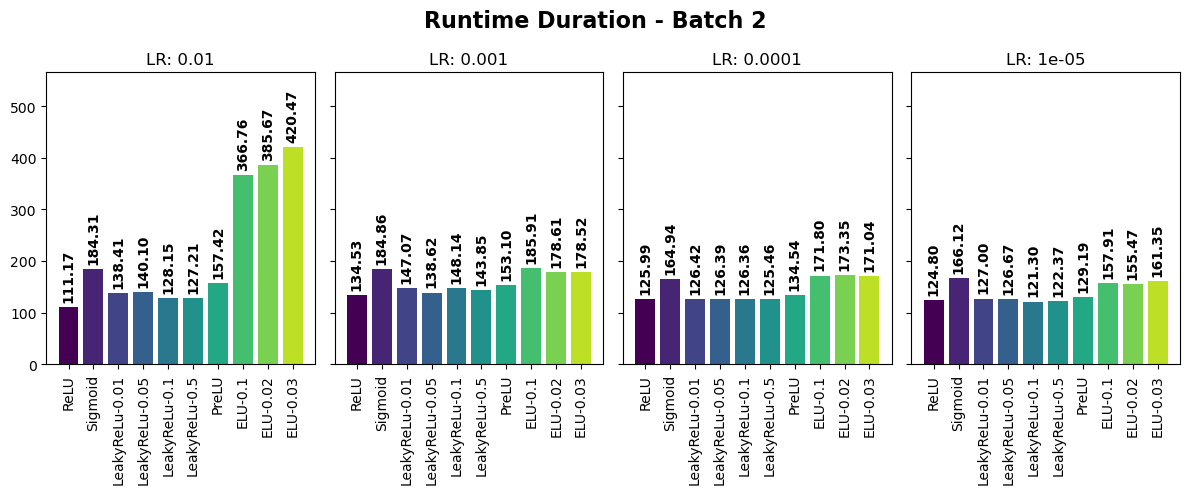

In [13]:
# Runtime duration

# data prep
activation_functions1 = df_performance1["Activation Function"].unique()
learning_rates1 = df_performance1["Learning Rate"].unique()

# Bar plot
fig, axes = plt.subplots(1, len(learning_rates1), figsize=(12, 5), sharey=True)
fig.suptitle("Runtime Duration - Batch 2", fontsize=16, fontweight="bold")

for ax, lrate in zip(axes, learning_rates1):
    subset = df_performance1[df_performance1["Learning Rate"] == lrate]
    x_positions = np.arange(len(subset))
    colors = [color_dict[func] for func in subset["Activation Function"]]
    durations1 = subset["Duration"]
    
    bars4 = ax.bar(subset["Activation Function"], durations1, color=colors)
    
    ax.set_title(f"LR: {lrate}")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(subset["Activation Function"], rotation=90)

    for bar, duration1 in zip(bars4, durations1):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
            bar.get_height() + 10,             # Y position (just above the bar)
            f"{duration1:.2f}",                  # Text (formatted duration)
            ha="center", va="bottom", fontsize=10, fontweight="bold",
            rotation = 90
            )
    ax.set_ylim(0, max(durations1) + 400)
    
plt.tight_layout()
plt.show()

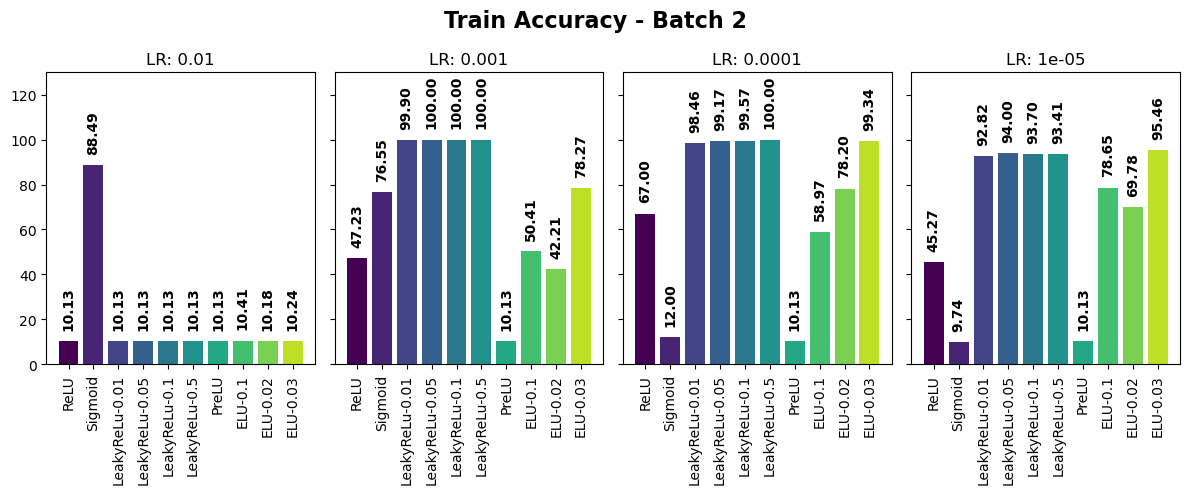

In [14]:
# Train accuracy

# Bar plot
fig, axes = plt.subplots(1, len(learning_rates1), figsize=(12, 5), sharey=True)
fig.suptitle("Train Accuracy - Batch 2", fontsize=16, fontweight="bold")
for ax, lrate in zip(axes, learning_rates1):
    subset = df_performance1[df_performance1["Learning Rate"] == lrate]
    x_positions = np.arange(len(subset))
    colors = [color_dict[func] for func in subset["Activation Function"]]
    train_accuracy1 = subset["Train Accuracy"]
    
    bars5 = ax.bar(subset["Activation Function"], train_accuracy1, color=colors)
    
    ax.set_title(f"LR: {lrate}")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(subset["Activation Function"], rotation=90)

    for bar, train_acc1 in zip(bars5, train_accuracy1):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
            bar.get_height() + 5,             # Y position (just above the bar)
            f"{train_acc1:.2f}",                  # Text (formatted duration)
            ha="center", va="bottom", fontsize=10, fontweight="bold",
            rotation = 90
            )
    ax.set_ylim(0, 130)
    
plt.tight_layout()
plt.show()

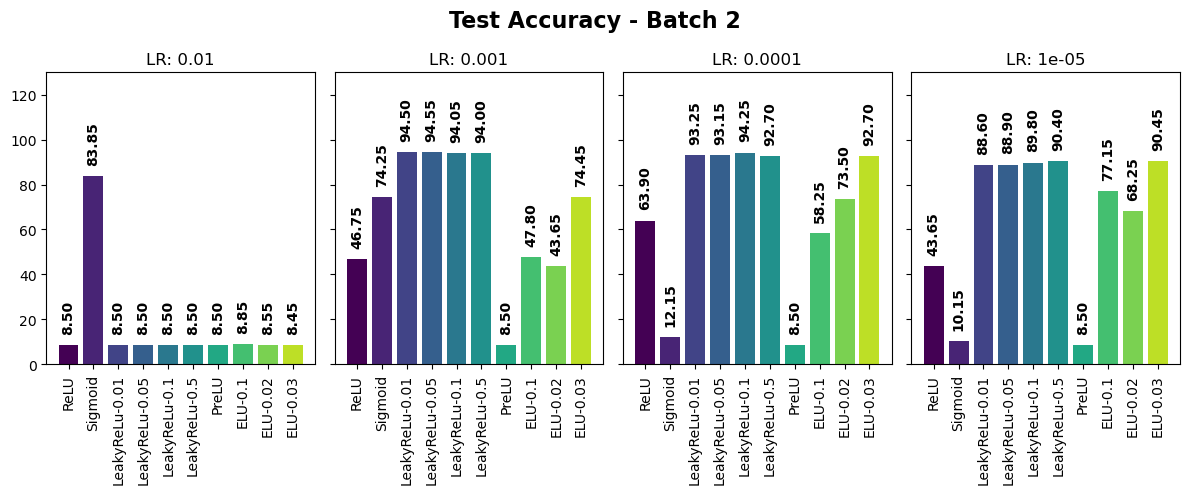

In [15]:
# Test accuracy

# Bar plot
fig, axes = plt.subplots(1, len(learning_rates1), figsize=(12, 5), sharey=True)
fig.suptitle("Test Accuracy - Batch 2", fontsize=16, fontweight="bold")
for ax, lrate in zip(axes, learning_rates1):
    subset = df_performance1[df_performance1["Learning Rate"] == lrate]
    x_positions = np.arange(len(subset))
    colors = [color_dict[func] for func in subset["Activation Function"]]
    test_accuracy1 = subset["Test Accuracy"]
    
    bars6 = ax.bar(subset["Activation Function"], test_accuracy1, color=colors)
    
    ax.set_title(f"LR: {lrate}")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(subset["Activation Function"], rotation=90)

    for bar, test_acc1 in zip(bars6, test_accuracy1):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
            bar.get_height() + 5,             # Y position (just above the bar)
            f"{test_acc1:.2f}",                  # Text (formatted duration)
            ha="center", va="bottom", fontsize=10, fontweight="bold",
            rotation = 90
            )
    ax.set_ylim(0, 130)
    
plt.tight_layout()
plt.show()

## Batch 3 - Back to 100 Epochs and ADD +2 Hidden Layer
The accuracy increase of the doubled epochs were not worth the significantly extended duration time. In this step we are going to our baseline parameters, but add another hidden layer with 512 neurons to our NN.

In [46]:
#input_size = 28 * 28
#output_size = 10
# ---> hidden_layer_neurons = [512,512,512]

# epochs = 100 

#learning_rates = [0.01, 0.001, 0.0001, 0.00001]
#optimizer = optim.SGD
#loss_function = nn.CrossEntropyLoss(), except for sigmoid =nn.BCEWithLogitsLoss()
#activation_functions = {
#    "ReLU": nn.ReLU(),
#    "Sigmoid": nn.Sigmoid(),
#    "LeakyReLu-0.01": nn.LeakyReLU(negative_slope=0.01),
#    "LeakyReLu-0.05": nn.LeakyReLU(negative_slope=0.05),
#    "LeakyReLu-0.1": nn.LeakyReLU(negative_slope=0.1),
#    "LeakyReLu-0.5": nn.LeakyReLU(negative_slope=0.5),
#    "PreLU": nn.PReLU(),
#    "ELU-0.1": nn.ELU(alpha=0.1),
#    "ELU-0.02": nn.ELU(alpha=0.2),
#    "ELU-0.03": nn.ELU(alpha=0.3)}

In [30]:
# load latest Performance File
df_performance2 = pd.read_csv("./output/2025-03-10 11-54_performance.csv")
df_performance2["Epochs"] = 100
df_performance2["Batch"] = 3

print(f"Shape: {df_performance2.shape}")
df_performance2.sort_values("Test Accuracy", ascending=False).head(10)

Shape: (40, 8)


,Learning Rate,Activation Function,Loss,Duration,Train Accuracy,Test Accuracy,Epochs,Batch
2,0.0100,LeakyReLu-0.01,0.0000,83.00,99.987498,96.10,100,3
9,0.0100,ELU-0.03,0.0001,125.04,99.987498,95.75,100,3
3,0.0100,LeakyReLu-0.05,0.0001,81.05,100.000000,95.20,100,3
18,0.0010,ELU-0.02,0.0011,122.18,99.949994,94.95,100,3
12,0.0010,LeakyReLu-0.01,0.0019,91.50,99.962495,94.95,100,3
14,0.0010,LeakyReLu-0.1,0.0016,99.67,100.000000,94.60,100,3
13,0.0010,LeakyReLu-0.05,0.0014,96.64,99.949994,94.35,100,3
20,0.0001,ReLU,0.0125,93.04,99.424928,94.15,100,3
22,0.0001,LeakyReLu-0.01,0.0322,83.28,99.637455,94.00,100,3
15,0.0010,LeakyReLu-0.5,0.0037,106.27,100.000000,93.70,100,3


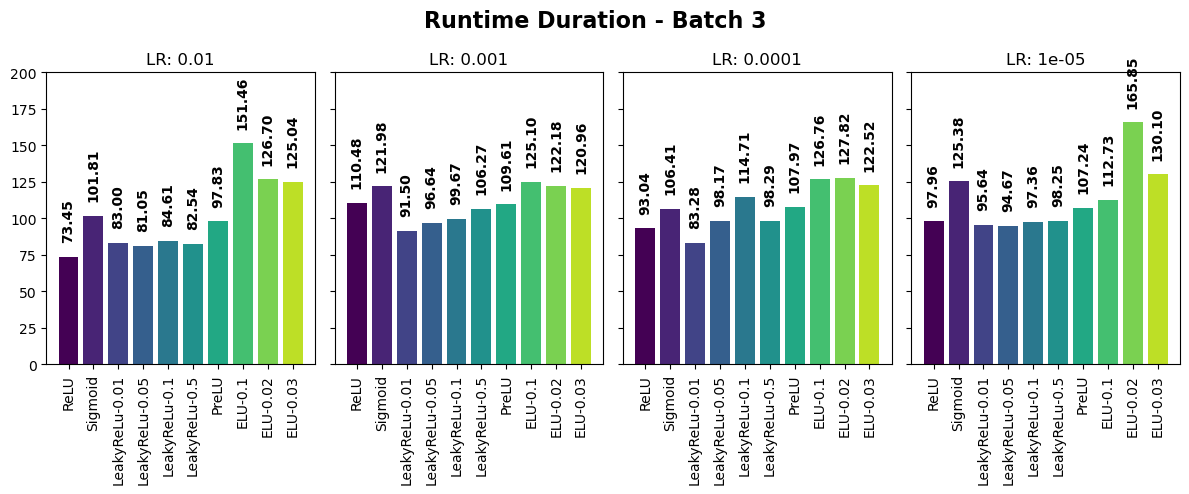

In [34]:
# Runtime duration

# data prep
activation_functions2 = df_performance2["Activation Function"].unique()
learning_rates2 = df_performance2["Learning Rate"].unique()

# Bar plot
fig, axes = plt.subplots(1, len(learning_rates2), figsize=(12, 5), sharey=True)
fig.suptitle("Runtime Duration - Batch 3", fontsize=16, fontweight="bold")

for ax, lrate in zip(axes, learning_rates2):
    subset = df_performance2[df_performance2["Learning Rate"] == lrate]
    x_positions = np.arange(len(subset))
    colors = [color_dict[func] for func in subset["Activation Function"]]
    durations2 = subset["Duration"]
    
    bars7 = ax.bar(subset["Activation Function"], durations2, color=colors)
    
    ax.set_title(f"LR: {lrate}")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(subset["Activation Function"], rotation=90)

    for bar, duration2 in zip(bars7, durations2):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
            bar.get_height() + 10,             # Y position (just above the bar)
            f"{duration2:.2f}",                  # Text (formatted duration)
            ha="center", va="bottom", fontsize=10, fontweight="bold",
            rotation = 90
            )
    ax.set_ylim(0, 200)
    
plt.tight_layout()
plt.show()

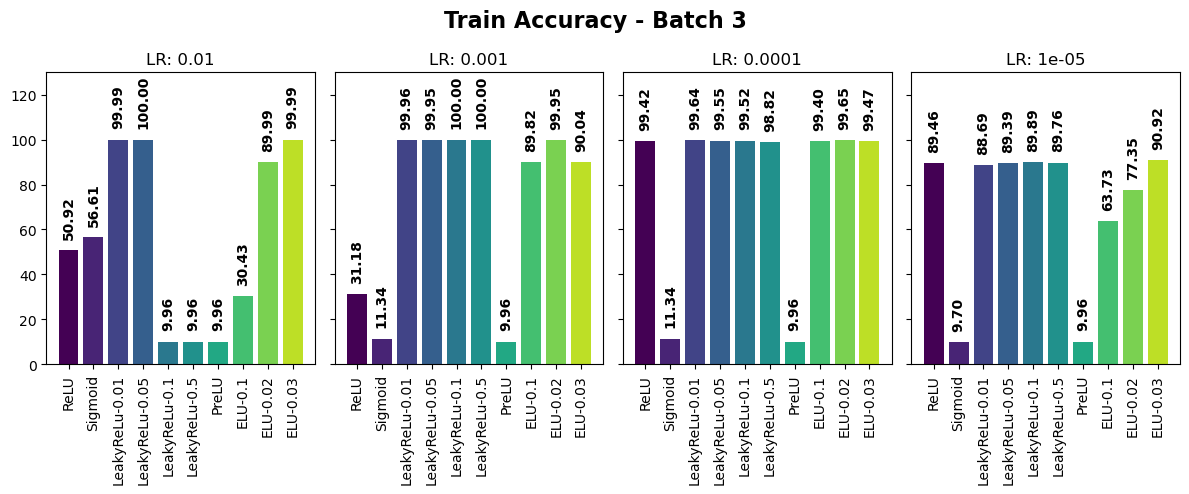

In [38]:
# Train accuracy

# Bar plot
fig, axes = plt.subplots(1, len(learning_rates2), figsize=(12, 5), sharey=True)
fig.suptitle("Train Accuracy - Batch 3", fontsize=16, fontweight="bold")
for ax, lrate in zip(axes, learning_rates2):
    subset = df_performance2[df_performance2["Learning Rate"] == lrate]
    x_positions = np.arange(len(subset))
    colors = [color_dict[func] for func in subset["Activation Function"]]
    train_accuracy2 = subset["Train Accuracy"]
    
    bars8 = ax.bar(subset["Activation Function"], train_accuracy2, color=colors)
    
    ax.set_title(f"LR: {lrate}")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(subset["Activation Function"], rotation=90)

    for bar, train_acc2 in zip(bars8, train_accuracy2):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
            bar.get_height() + 5,             # Y position (just above the bar)
            f"{train_acc2:.2f}",                  # Text (formatted duration)
            ha="center", va="bottom", fontsize=10, fontweight="bold",
            rotation = 90
            )
    ax.set_ylim(0, 130)
    
plt.tight_layout()
plt.show()

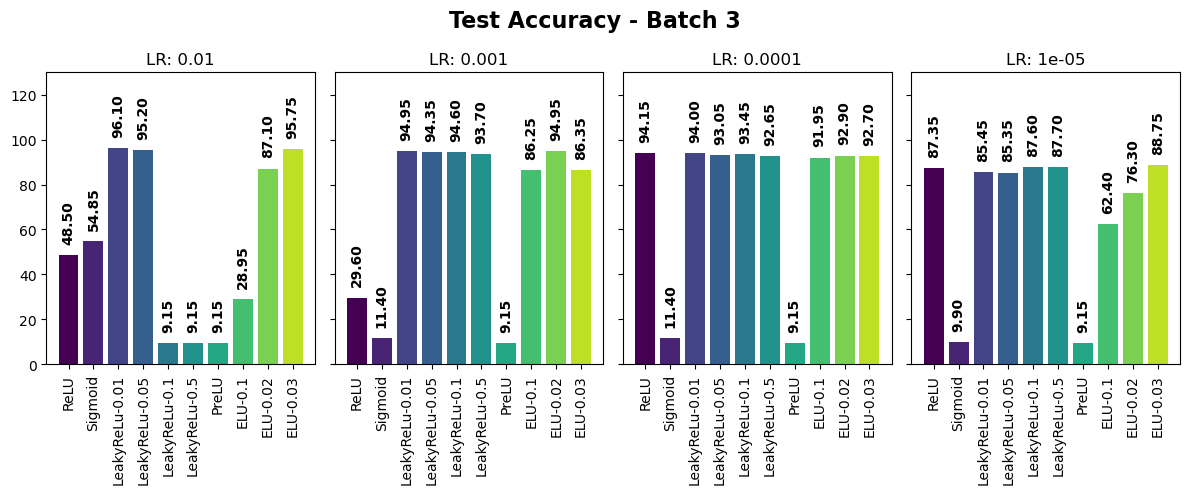

In [42]:
# Test accuracy

# Bar plot
fig, axes = plt.subplots(1, len(learning_rates2), figsize=(12, 5), sharey=True)
fig.suptitle("Test Accuracy - Batch 3", fontsize=16, fontweight="bold")
for ax, lrate in zip(axes, learning_rates2):
    subset = df_performance2[df_performance2["Learning Rate"] == lrate]
    x_positions = np.arange(len(subset))
    colors = [color_dict[func] for func in subset["Activation Function"]]
    test_accuracy2 = subset["Test Accuracy"]
    
    bars9 = ax.bar(subset["Activation Function"], test_accuracy2, color=colors)
    
    ax.set_title(f"LR: {lrate}")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(subset["Activation Function"], rotation=90)

    for bar, test_acc2 in zip(bars9, test_accuracy2):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
            bar.get_height() + 5,             # Y position (just above the bar)
            f"{test_acc2:.2f}",                  # Text (formatted duration)
            ha="center", va="bottom", fontsize=10, fontweight="bold",
            rotation = 90
            )
    ax.set_ylim(0, 130)
    
plt.tight_layout()
plt.show()

## Batch 4 - 3 Hidden Layers with adjusted neurons
The accuracy increase of the two added hidden layers were remarkable, compared to the baseline with a only slightly increase in runtime. 
Each neuronal hidden layer had 512 neurons, now we are sizing them to narrow down from 784 to 10 in steps 392, 196 and 98 (each half of the size of the previous one).

In [49]:
#input_size = 28 * 28
#output_size = 10
# ---> hidden_layer_neurons = [392,196,98]

# epochs = 100 

#learning_rates = [0.01, 0.001, 0.0001, 0.00001]
#optimizer = optim.SGD
#loss_function = nn.CrossEntropyLoss(), except for sigmoid =nn.BCEWithLogitsLoss()
#activation_functions = {
#    "ReLU": nn.ReLU(),
#    "Sigmoid": nn.Sigmoid(),
#    "LeakyReLu-0.01": nn.LeakyReLU(negative_slope=0.01),
#    "LeakyReLu-0.05": nn.LeakyReLU(negative_slope=0.05),
#    "LeakyReLu-0.1": nn.LeakyReLU(negative_slope=0.1),
#    "LeakyReLu-0.5": nn.LeakyReLU(negative_slope=0.5),
#    "PreLU": nn.PReLU(),
#    "ELU-0.1": nn.ELU(alpha=0.1),
#    "ELU-0.02": nn.ELU(alpha=0.2),
#    "ELU-0.03": nn.ELU(alpha=0.3)}

In [51]:
# load latest Performance File
df_performance3 = pd.read_csv("./output/2025-03-10 13-12_performance.csv")
df_performance3["Epochs"] = 100
df_performance3["Batch"] = 4

print(f"Shape: {df_performance3.shape}")
df_performance3.sort_values("Test Accuracy", ascending=False).head(10)

Shape: (40, 8)


,Learning Rate,Activation Function,Loss,Duration,Train Accuracy,Test Accuracy,Epochs,Batch
2,0.010,LeakyReLu-0.01,0.0001,52.15,99.924991,95.00,100,4
3,0.010,LeakyReLu-0.05,0.0001,52.09,100.000000,95.00,100,4
4,0.010,LeakyReLu-0.1,0.0001,66.20,100.000000,94.90,100,4
19,0.001,ELU-0.03,0.0016,80.79,99.962495,94.85,100,4
12,0.001,LeakyReLu-0.01,0.0022,56.83,99.837480,94.65,100,4
17,0.001,ELU-0.1,0.0012,77.82,99.962495,94.55,100,4
18,0.001,ELU-0.02,0.0013,76.07,99.924991,94.25,100,4
14,0.001,LeakyReLu-0.1,0.0038,57.40,99.937492,94.20,100,4
13,0.001,LeakyReLu-0.05,0.0012,58.73,99.924991,94.20,100,4
15,0.001,LeakyReLu-0.5,0.0021,58.17,100.000000,93.45,100,4


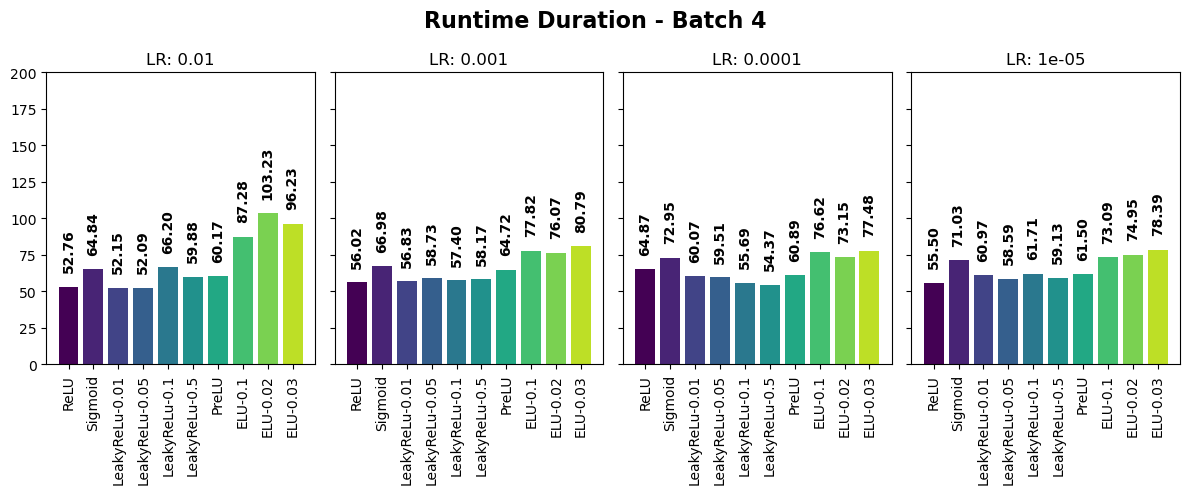

In [53]:
# Runtime duration

# data prep
activation_functions3 = df_performance3["Activation Function"].unique()
learning_rates3 = df_performance3["Learning Rate"].unique()

# Bar plot
fig, axes = plt.subplots(1, len(learning_rates3), figsize=(12, 5), sharey=True)
fig.suptitle("Runtime Duration - Batch 4", fontsize=16, fontweight="bold")

for ax, lrate in zip(axes, learning_rates3):
    subset = df_performance3[df_performance3["Learning Rate"] == lrate]
    x_positions = np.arange(len(subset))
    colors = [color_dict[func] for func in subset["Activation Function"]]
    durations3 = subset["Duration"]
    
    bars10 = ax.bar(subset["Activation Function"], durations3, color=colors)
    
    ax.set_title(f"LR: {lrate}")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(subset["Activation Function"], rotation=90)

    for bar, duration3 in zip(bars10, durations3):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
            bar.get_height() + 10,             # Y position (just above the bar)
            f"{duration3:.2f}",                  # Text (formatted duration)
            ha="center", va="bottom", fontsize=10, fontweight="bold",
            rotation = 90
            )
    ax.set_ylim(0, 200)
    
plt.tight_layout()
plt.show()

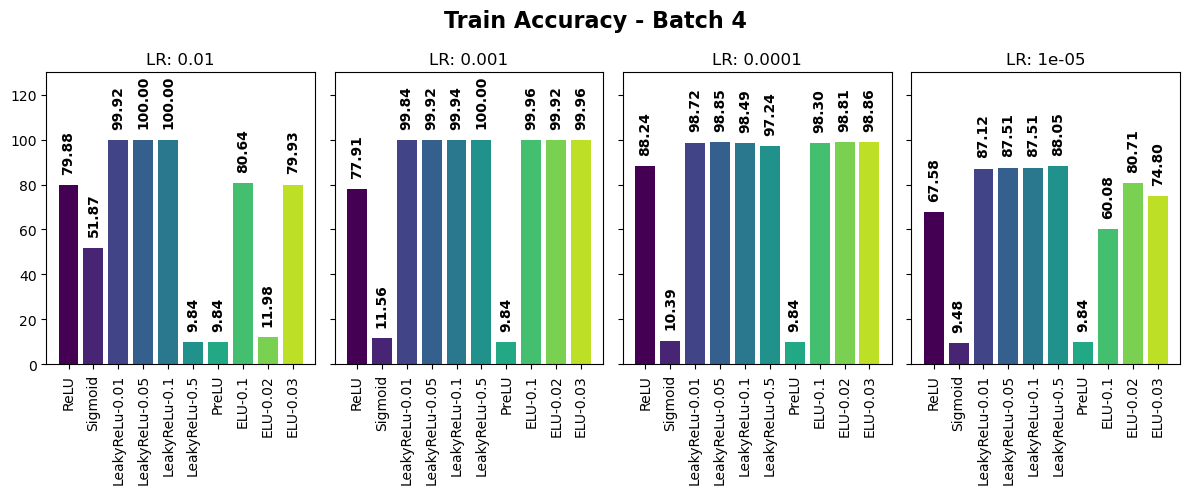

In [55]:
# Train accuracy

# Bar plot
fig, axes = plt.subplots(1, len(learning_rates3), figsize=(12, 5), sharey=True)
fig.suptitle("Train Accuracy - Batch 4", fontsize=16, fontweight="bold")
for ax, lrate in zip(axes, learning_rates3):
    subset = df_performance3[df_performance3["Learning Rate"] == lrate]
    x_positions = np.arange(len(subset))
    colors = [color_dict[func] for func in subset["Activation Function"]]
    train_accuracy3 = subset["Train Accuracy"]
    
    bars11 = ax.bar(subset["Activation Function"], train_accuracy3, color=colors)
    
    ax.set_title(f"LR: {lrate}")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(subset["Activation Function"], rotation=90)

    for bar, train_acc3 in zip(bars11, train_accuracy3):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
            bar.get_height() + 5,             # Y position (just above the bar)
            f"{train_acc3:.2f}",                  # Text (formatted duration)
            ha="center", va="bottom", fontsize=10, fontweight="bold",
            rotation = 90
            )
    ax.set_ylim(0, 130)
    
plt.tight_layout()
plt.show()

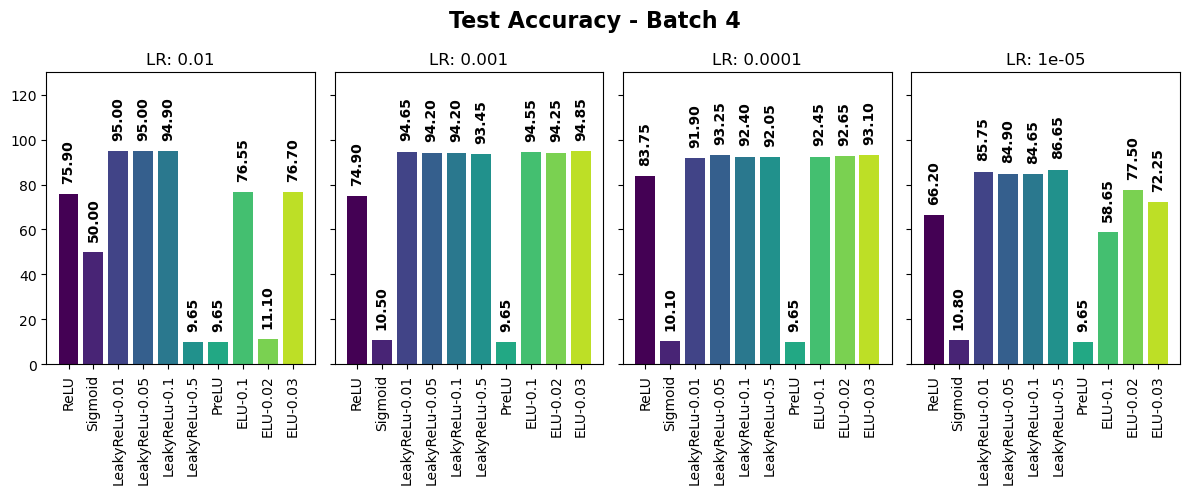

In [57]:
# Test accuracy

# Bar plot
fig, axes = plt.subplots(1, len(learning_rates3), figsize=(12, 5), sharey=True)
fig.suptitle("Test Accuracy - Batch 4", fontsize=16, fontweight="bold")
for ax, lrate in zip(axes, learning_rates3):
    subset = df_performance3[df_performance3["Learning Rate"] == lrate]
    x_positions = np.arange(len(subset))
    colors = [color_dict[func] for func in subset["Activation Function"]]
    test_accuracy3 = subset["Test Accuracy"]
    
    bars12 = ax.bar(subset["Activation Function"], test_accuracy3, color=colors)
    
    ax.set_title(f"LR: {lrate}")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(subset["Activation Function"], rotation=90)

    for bar, test_acc3 in zip(bars12, test_accuracy3):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
            bar.get_height() + 5,             # Y position (just above the bar)
            f"{test_acc3:.2f}",                  # Text (formatted duration)
            ha="center", va="bottom", fontsize=10, fontweight="bold",
            rotation = 90
            )
    ax.set_ylim(0, 130)
    
plt.tight_layout()
plt.show()

## Batch 5 - Adam optimizer
The accuracy decreses with the number of neurons of each layer, but also the runtime slightly. But we are going back to the initial number size of 512, and we are changing instead the optimizer function from SGD to ADAM.

In [135]:
# input_size = 28 * 28
# output_size = 10
# hidden_layer_neurons = [512,512,512]

# epochs = 100 

# learning_rates = [0.01, 0.001, 0.0001, 0.00001]
# -->optimizer = optim.Adam
# activation_functions = {
#    "ReLU": nn.ReLU(),
#    "Sigmoid": nn.Sigmoid(),
#    "LeakyReLu-0.01": nn.LeakyReLU(negative_slope=0.01),
#    "LeakyReLu-0.05": nn.LeakyReLU(negative_slope=0.05),
#    "LeakyReLu-0.1": nn.LeakyReLU(negative_slope=0.1),
#    "LeakyReLu-0.5": nn.LeakyReLU(negative_slope=0.5),
#    "PreLU": nn.PReLU(),
#    "ELU-0.1": nn.ELU(alpha=0.1),
#    "ELU-0.02": nn.ELU(alpha=0.2),
#    "ELU-0.03": nn.ELU(alpha=0.3)}

In [139]:
# load latest Performance File
df_performance4 = pd.read_csv("./output/2025-03-07 15-25_performance.csv")
df_performance4["Epochs"] = 100
df_performance4["Batch"] = 5

print(f"Shape: {df_performance4.shape}")
df_performance4.sort_values("Test Accuracy", ascending=False).head(10)

Shape: (40, 8)


,Learning Rate,Activation Function,Loss,Duration,Train Accuracy,Test Accuracy,Epochs,Batch
14,0.0010,LeakyReLu-0.1,0.0008,66.35,100.000000,95.05,100,5
12,0.0010,LeakyReLu-0.01,0.0006,66.03,99.612452,94.60,100,5
13,0.0010,LeakyReLu-0.05,0.0003,65.95,99.974997,94.20,100,5
15,0.0010,LeakyReLu-0.5,0.0007,65.93,100.000000,93.95,100,5
22,0.0001,LeakyReLu-0.01,0.0220,66.39,98.362295,93.15,100,5
24,0.0001,LeakyReLu-0.1,0.0593,65.70,98.462308,92.80,100,5
29,0.0001,ELU-0.03,0.0463,89.14,98.537317,92.10,100,5
23,0.0001,LeakyReLu-0.05,0.0094,65.95,97.912239,91.95,100,5
25,0.0001,LeakyReLu-0.5,0.0202,65.32,99.662458,91.80,100,5
20,0.0001,ReLU,0.2283,65.29,96.449556,90.70,100,5


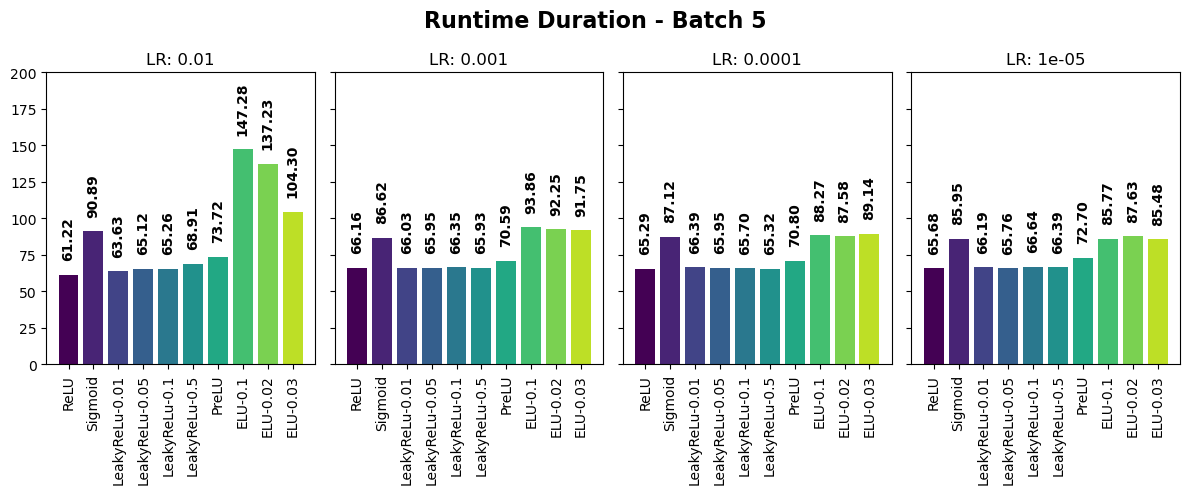

In [141]:
# Runtime duration

# data prep
activation_functions4 = df_performance4["Activation Function"].unique()
learning_rates4 = df_performance4["Learning Rate"].unique()

# Bar plot
fig, axes = plt.subplots(1, len(learning_rates4), figsize=(12, 5), sharey=True)
fig.suptitle("Runtime Duration - Batch 5", fontsize=16, fontweight="bold")

for ax, lrate in zip(axes, learning_rates4):
    subset = df_performance4[df_performance4["Learning Rate"] == lrate]
    x_positions = np.arange(len(subset))
    colors = [color_dict[func] for func in subset["Activation Function"]]
    durations4 = subset["Duration"]
    
    bars13 = ax.bar(subset["Activation Function"], durations4, color=colors)
    
    ax.set_title(f"LR: {lrate}")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(subset["Activation Function"], rotation=90)

    for bar, duration4 in zip(bars13, durations4):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
            bar.get_height() + 10,             # Y position (just above the bar)
            f"{duration4:.2f}",                  # Text (formatted duration)
            ha="center", va="bottom", fontsize=10, fontweight="bold",
            rotation = 90
            )
    ax.set_ylim(0, 200)
    
plt.tight_layout()
plt.show()

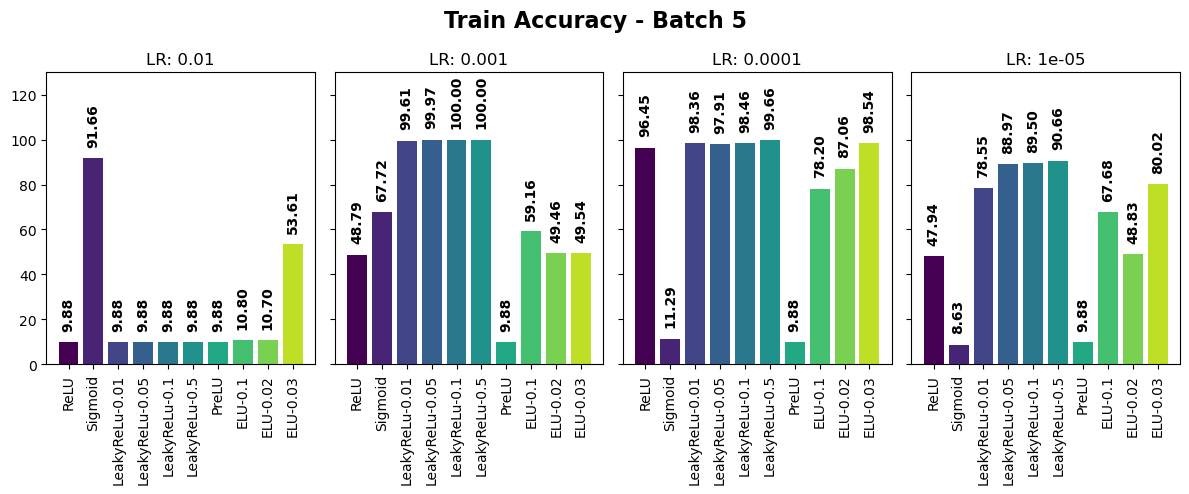

In [145]:
# Train accuracy

# Bar plot
fig, axes = plt.subplots(1, len(learning_rates4), figsize=(12, 5), sharey=True)
fig.suptitle("Train Accuracy - Batch 5", fontsize=16, fontweight="bold")
for ax, lrate in zip(axes, learning_rates4):
    subset = df_performance4[df_performance4["Learning Rate"] == lrate]
    x_positions = np.arange(len(subset))
    colors = [color_dict[func] for func in subset["Activation Function"]]
    train_accuracy4 = subset["Train Accuracy"]
    
    bars14 = ax.bar(subset["Activation Function"], train_accuracy4, color=colors)
    
    ax.set_title(f"LR: {lrate}")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(subset["Activation Function"], rotation=90)

    for bar, train_acc4 in zip(bars14, train_accuracy4):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
            bar.get_height() + 5,             # Y position (just above the bar)
            f"{train_acc4:.2f}",                  # Text (formatted duration)
            ha="center", va="bottom", fontsize=10, fontweight="bold",
            rotation = 90
            )
    ax.set_ylim(0, 130)
    
plt.tight_layout()
plt.show()

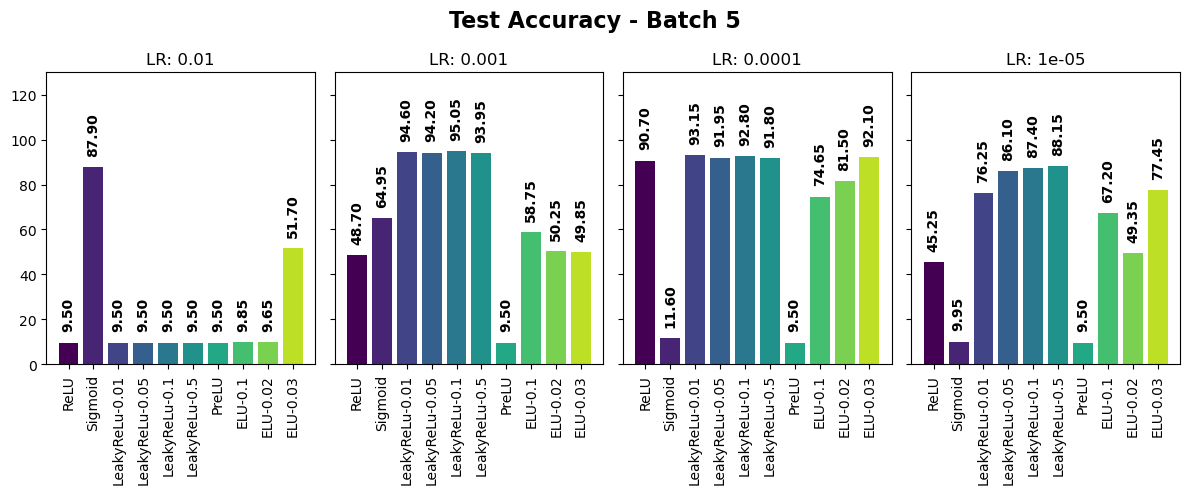

In [147]:
# Test accuracy

# Bar plot
fig, axes = plt.subplots(1, len(learning_rates4), figsize=(12, 5), sharey=True)
fig.suptitle("Test Accuracy - Batch 5", fontsize=16, fontweight="bold")
for ax, lrate in zip(axes, learning_rates4):
    subset = df_performance4[df_performance4["Learning Rate"] == lrate]
    x_positions = np.arange(len(subset))
    colors = [color_dict[func] for func in subset["Activation Function"]]
    test_accuracy4 = subset["Test Accuracy"]
    
    bars15 = ax.bar(subset["Activation Function"], test_accuracy4, color=colors)
    
    ax.set_title(f"LR: {lrate}")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(subset["Activation Function"], rotation=90)

    for bar, test_acc4 in zip(bars15, test_accuracy4):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
            bar.get_height() + 5,             # Y position (just above the bar)
            f"{test_acc4:.2f}",                  # Text (formatted duration)
            ha="center", va="bottom", fontsize=10, fontweight="bold",
            rotation = 90
            )
    ax.set_ylim(0, 130)
    
plt.tight_layout()
plt.show()

# Batch 6 - Reduce epochs to 50
Hyperparameters like Batch 3, but only 50 epochs instead of 100.

In [253]:
# load latest Performance File
df_performance5 = pd.read_csv("./output/2025-03-10 19-41_performance.csv")
df_performance5["Epochs"] = 50
df_performance5["Batch"] = 6

print(f"Shape: {df_performance5.shape}")
df_performance5.sort_values("Test Accuracy", ascending=False).head(10)

Shape: (40, 8)


,Learning Rate,Activation Function,Loss,Duration,Train Accuracy,Test Accuracy,Epochs,Batch
2,0.0100,LeakyReLu-0.01,0.0002,35.35,99.962495,96.50,50,6
12,0.0010,LeakyReLu-0.01,0.0060,41.97,99.824978,95.65,50,6
18,0.0010,ELU-0.02,0.0039,54.09,99.924991,95.35,50,6
15,0.0010,LeakyReLu-0.5,0.0031,42.12,100.000000,95.35,50,6
19,0.0010,ELU-0.03,0.0056,52.48,99.962495,95.30,50,6
14,0.0010,LeakyReLu-0.1,0.0051,40.12,99.924991,95.25,50,6
13,0.0010,LeakyReLu-0.05,0.0059,43.77,99.899987,95.15,50,6
29,0.0001,ELU-0.03,0.0776,63.59,97.487186,93.65,50,6
23,0.0001,LeakyReLu-0.05,0.0601,41.16,97.749719,93.30,50,6
25,0.0001,LeakyReLu-0.5,0.1497,57.38,96.387048,93.25,50,6


# Final Evaluation
In this evaluation we tested the our NN with different hyperparameters. As there is no general apporach to optimize neural netowrks. It is a lot about try & error, and further testing of the hyper parameters. The accuracy should stay in reason to the runtime of the NN.

But please don't worry about the ecological impact of the NN testing in this case, it was all done with self generated solar energy on my laptop.

In the last step we are concatinating all dataframes and calculate an "efficiency ratio" based on the duration and output test_accuracy.

In [258]:
# Data Preparation

df = pd.concat([df_performance, df_performance1, df_performance2, df_performance3, df_performance4, df_performance5], axis=0, ignore_index=True)
print(df.shape)
df.sort_values("Test Accuracy", ascending=False).head(15)

(240, 8)


,Learning Rate,Activation Function,Loss,Duration,Train Accuracy,Test Accuracy,Epochs,Batch
202,0.010,LeakyReLu-0.01,0.0002,35.35,99.962495,96.50,50,6
82,0.010,LeakyReLu-0.01,0.0000,83.00,99.987498,96.10,100,3
89,0.010,ELU-0.03,0.0001,125.04,99.987498,95.75,100,3
212,0.001,LeakyReLu-0.01,0.0060,41.97,99.824978,95.65,50,6
218,0.001,ELU-0.02,0.0039,54.09,99.924991,95.35,50,6
215,0.001,LeakyReLu-0.5,0.0031,42.12,100.000000,95.35,50,6
219,0.001,ELU-0.03,0.0056,52.48,99.962495,95.30,50,6
214,0.001,LeakyReLu-0.1,0.0051,40.12,99.924991,95.25,50,6
83,0.010,LeakyReLu-0.05,0.0001,81.05,100.000000,95.20,100,3
213,0.001,LeakyReLu-0.05,0.0059,43.77,99.899987,95.15,50,6


Text(0, 0.5, 'Accuracy [%]')

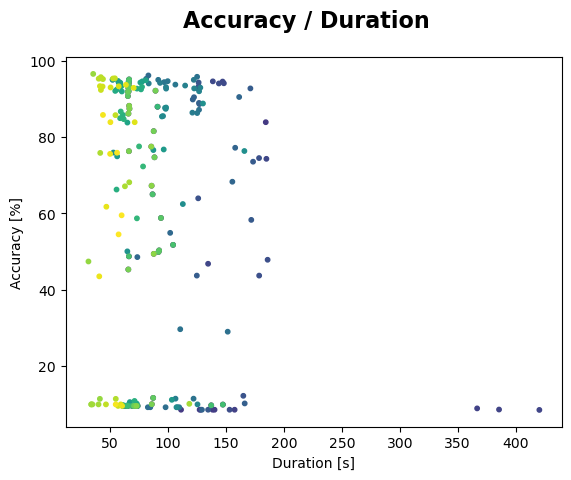

In [260]:
# Scatterplot Accuracy vs Duration

fig,ax = plt.subplots()
fig.suptitle("Accuracy / Duration", fontsize=16, fontweight="bold")
ax.scatter(df["Duration"], df["Test Accuracy"], s=10, c=df.index, cmap="viridis")
ax.set_xlabel("Duration [s]")
ax.set_ylabel("Accuracy [%]")

Text(0, 0.5, 'Avg Duration [s]')

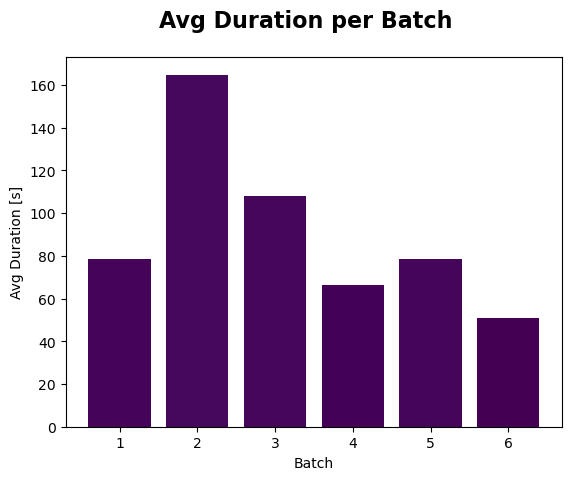

In [262]:
# Duration per Batch
df_dur = pd.DataFrame(df.groupby("Batch")["Duration"].mean().sort_values())
df_dur.reset_index(inplace=True)


fig,ax = plt.subplots()
fig.suptitle("Avg Duration per Batch", fontsize=16, fontweight="bold")
ax.bar(df_dur["Batch"], df_dur["Duration"], color=cmap.colors)
ax.set_xlabel("Batch")
ax.set_ylabel("Avg Duration [s]")

In [266]:
# Efficiency Score: 94% Treshold
df["Efficiency"] = round(df["Test Accuracy"].apply(lambda x: (x-94)) / np.sqrt(df["Duration"])*100,1)
df.sort_values("Efficiency", ascending=False).head(15)

,Learning Rate,Activation Function,Loss,Duration,Train Accuracy,Test Accuracy,Epochs,Batch,Efficiency
202,0.010,LeakyReLu-0.01,0.0002,35.35,99.962495,96.50,50,6,42.0
212,0.001,LeakyReLu-0.01,0.0060,41.97,99.824978,95.65,50,6,25.5
82,0.010,LeakyReLu-0.01,0.0000,83.00,99.987498,96.10,100,3,23.1
215,0.001,LeakyReLu-0.5,0.0031,42.12,100.000000,95.35,50,6,20.8
214,0.001,LeakyReLu-0.1,0.0051,40.12,99.924991,95.25,50,6,19.7
218,0.001,ELU-0.02,0.0039,54.09,99.924991,95.35,50,6,18.4
219,0.001,ELU-0.03,0.0056,52.48,99.962495,95.30,50,6,17.9
213,0.001,LeakyReLu-0.05,0.0059,43.77,99.899987,95.15,50,6,17.4
89,0.010,ELU-0.03,0.0001,125.04,99.987498,95.75,100,3,15.6
123,0.010,LeakyReLu-0.05,0.0001,52.09,100.000000,95.00,100,4,13.9


# Learnings 
Through this performance evaluation, I was able to make some discoveries and learned the following:
- An increase in epochs only results in an increase in accuracy to a certain extent, but the runtime always increases proportionally. Optimizing the epochs should therefore be the first priority for efficiency.
- Increasing the hidden layers with a large number of neurons increases performance enormously, but the runtime of the NN is also dependent on the number of neurons. Reducing the number of neurons also quickly leads to lower runtimes of the NN.
- For the MNIST data set, the choice of optimizer had no major influence. Both SGD and ADAM delivered similar results.
- The LeakyReLu activation function had the best output for the MNIST dataset for many configurations.
- Some activation functions could not provide reasonable results for any parameter set. Further parameter tests would have to be carried out heersion)